In [1]:
#data used can be found: https://www.10xgenomics.com/datasets/20-k-mixture-of-nsclc-dt-cs-from-7-donors-3-v-3-1-3-1-standard-6-1-0

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Project & Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/03/LungCACXR.PNG" width="400" style="margin-top: 20px;">
</center>

Non-small cell lung cancer (NSCLC) dissociated tumor cells from 7 donors were obtained from Discovery Life Sciences. Cells were labeled with TotalSeq™-B Human TBNK Cocktail (BioLegend). Each donor was CellPlexed and pooled at equal proportions. Viable cells in the pool were identified by 7AAD staining and sorted via FACS.

Gene Expression and CellPlex libraries were generated from ~33,000 cells as described in the Chromium Single Cell 3' Reagent Kits User Guide (v3.1 Chemistry Dual Index) with Feature Barcode technology for Cell Surface Protein and Cell Multiplexing (CG000390 Rev B) using the Chromium X and sequenced on an Illumina NovaSeq 6000 to a read depth of approximately 70,000 mean reads per cell for Gene Expression and 25,000 mean reads per cell for CellPlex.

Paired-end, dual indexing:

Read 1: 28 cycles (16 bp barcode, 12 bp UMI)
i5 index: 10 cycles (sample index)
i7 index: 10 cycles (sample index)
Read 2: 90 cycles (transcript)
Analysis parameters used: expect-cells=20000

Pooled multiplexed sample - Key metrics:

Estimated number of cells: 16,443
Cells assigned to a sample: 12,231


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load Libraries

In [108]:
options(mem.maxVSize = 32 * 1024^3)
#Read in libraries
library(Seurat)
library(tidyverse)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Parameter Section

In [74]:
#Input Parameter 
input_data <- "/Users/freddymappin/Desktop/BioinformaticHub/SingleCell2/20k_NSCLC_DTC_3p_nextgem_intron_Multiplex_count_raw_feature_bc_matrix.h5" # Path to the 10X data
project_name <-"nsclc" # Name of the project (used in Seurat object metadata)

#Filtering Data
n_Feature_RNA_low <- 200 # We filter cells that have unique feature counts over 2,500 or less than 200
n_Feature_RNA_high <- 2500 # We filter cells that have unique feature counts over 2,500 or less than 200
percent_mt <- 5 #We filter cells that have >5% mitochondrial counts

#Normalize 
normalize = "LogNormalize"  #global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression
scale_factor = 10000 #multiplies this by a scale factor (10,000 by default)

#Feature Selection
n_features = 2000 # top 2000 most varaible genes across the dataset
topn = 10 # number of highly variable genes to plot

# Scale Data 

# Visualize Data 

#Cluster the Cells


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load in Dataset

In [60]:

# Load the NSCLC dataset
sclc.sparse.m <- Read10X_h5(filename = input_data)
str(nsclc.sparse.m)
cts <-  nsclc.sparse.m$`Gene Expression`

Genome matrix has multiple modalities, returning a list of matrices for this genome



List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:104658357] 616 4583 9727 10485 13480 15202 16303 21902 24894 25667 ...
  .. ..@ p       : int [1:3862364] 0 0 0 14 17 17 27 27 32 32 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:104658357] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1"

In [64]:
# Initialize the Seurat object with the raw (non-normalized data).
nsclc.seurat.obj <- CreateSeuratObject(counts = cts, project = "NSCLC", min.cells = 3, min.features = 200)
str(nsclc.seurat.obj)
nsclc.seurat.obj

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:95593068] 41 61 66 78 79 87 92 102 149 210 ...
  .. .. .. .. .. .. ..@ p       : int [1:71881] 0 1592 1855 2181 2674 3020 3439 11601 16469 16776 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 32978 71880
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:95593068] 1 1 2 1 4 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:71880, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ 

An object of class Seurat 
32978 features across 71880 samples within 1 assay 
Active assay: RNA (32978 features, 0 variable features)
 1 layer present: counts

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality Control

orig.ident nCount_RNA nFeature_RNA
AAACCCAAGAATTTGG-1 NSCLC        2709      1592       
AAACCCAAGACCTCCG-1 NSCLC         305       263       
AAACCCAAGAGATTCA-1 NSCLC         376       326       
AAACCCAAGATTGACA-1 NSCLC         609       493       
AAACCCAAGCAAATCA-1 NSCLC         401       346       
AAACCCAAGCAATTCC-1 NSCLC         489       419       
AAACCCAAGCACTGGA-1 NSCLC       53503      8162       
AAACCCAAGCATGGGT-1 NSCLC       16688      4868       
AAACCCAAGCCGTTGC-1 NSCLC         348       307       
AAACCCAAGCCTCCAG-1 NSCLC        4226       522       
AAACCCAAGCCTCTCT-1 NSCLC         337       281       
AAACCCAAGCGGTAAC-1 NSCLC         359       320       
AAACCCAAGCTTCGTA-1 NSCLC         265       231       
AAACCCAAGCTTTCTT-1 NSCLC         309       270       
AAACCCAAGGAGAATG-1 NSCLC         317       270       
AAACCCAAGGCTCCCA-1 NSCLC         446       378       
AAACCCAAGGGAACAA-1 NSCLC         285       245       
AAACCCAAGGGAGGGT-1 NSCLC         598       341       
AAACCCAAGGGCTTCC-1 NSCLC      129141     10380       
AAACCCAAGGTCACTT-1 NSCLC         454       396       
AAACCCAAGGTGATCG-1 NSCLC         229       204       
AAACCCAAGTAACGTA-1 NSCLC         670       549       
AAACCCAAGTATCTGC-1 NSCLC         272       232       
AAACCCAAGTATGGAT-1 NSCLC         344       296       
AAACCCAAGTCATTGC-1 NSCLC         318       288       
AAACCCAAGTTAGTGA-1 NSCLC         326       285       
AAACCCACAAACCATC-1 NSCLC         366       325       
AAACCCACAAAGAACT-1 NSCLC         451       374       
AAACCCACAAAGCTAA-1 NSCLC         831       637       
AAACCCACAAATGATG-1 NSCLC         374       296       
⋮                  ⋮          ⋮          ⋮           
TTTGTTGGTGACGTCC-1 NSCLC        241       214        
TTTGTTGGTGCTTCAA-1 NSCLC        280       256        
TTTGTTGGTTCAACGT-1 NSCLC        252       228        
TTTGTTGGTTCCAAAC-1 NSCLC      20775      4954        
TTTGTTGGTTCTCACC-1 NSCLC        300       267        
TTTGTTGTCAACTGAC-1 NSCLC      14278      3576        
TTTGTTGTCAAGCCAT-1 NSCLC       5924      1984        
TTTGTTGTCAGACCCG-1 NSCLC        355       311        
TTTGTTGTCAGCTGTA-1 NSCLC      23841      4578        
TTTGTTGTCATCCTAT-1 NSCLC        347       289        
TTTGTTGTCATCTATC-1 NSCLC       6662      2365        
TTTGTTGTCCACCTGT-1 NSCLC        279       249        
TTTGTTGTCCACGTAA-1 NSCLC       2766      1284        
TTTGTTGTCCCATTTA-1 NSCLC        437       366        
TTTGTTGTCCGATAAC-1 NSCLC      30799      5784        
TTTGTTGTCCGCGGAT-1 NSCLC      20200      4829        
TTTGTTGTCCGTGGCA-1 NSCLC        224       204        
TTTGTTGTCCGTGTGG-1 NSCLC        222       212        
TTTGTTGTCCTGGGAC-1 NSCLC        267       240        
TTTGTTGTCGAAATCC-1 NSCLC       6598      1908        
TTTGTTGTCGCTACGG-1 NSCLC        309       268        
TTTGTTGTCGGTTCAA-1 NSCLC        339       293        
TTTGTTGTCTAAGAAG-1 NSCLC      35818      7185        
TTTGTTGTCTCGAACA-1 NSCLC        298       262        
TTTGTTGTCTCGCAGG-1 NSCLC        339       294        
TTTGTTGTCTGAGGCC-1 NSCLC        288       255        
TTTGTTGTCTGGGAGA-1 NSCLC        242       222        
TTTGTTGTCTGTCCCA-1 NSCLC        396       338        
TTTGTTGTCTTGGAAC-1 NSCLC       7290      2477        
TTTGTTGTCTTTCGAT-1 NSCLC        305       267

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAATTTGG-1 NSCLC        2709      1592         5.5740126
AAACCCAAGACCTCCG-1 NSCLC         305       263         3.2786885
AAACCCAAGAGATTCA-1 NSCLC         376       326         3.4574468
AAACCCAAGATTGACA-1 NSCLC         609       493         1.6420361
AAACCCAAGCAAATCA-1 NSCLC         401       346         1.7456359
AAACCCAAGCAATTCC-1 NSCLC         489       419         1.8404908
AAACCCAAGCACTGGA-1 NSCLC       53503      8162         4.4539559
AAACCCAAGCATGGGT-1 NSCLC       16688      4868         2.0194151
AAACCCAAGCCGTTGC-1 NSCLC         348       307         1.4367816
AAACCCAAGCCTCCAG-1 NSCLC        4226       522         7.7378135
AAACCCAAGCCTCTCT-1 NSCLC         337       281         1.1869436
AAACCCAAGCGGTAAC-1 NSCLC         359       320         2.2284123
AAACCCAAGCTTCGTA-1 NSCLC         265       231         1.1320755
AAACCCAAGCTTTCTT-1 NSCLC         309       270         0.9708738
AAACCCAAGGAGAATG-1 NSCLC         317       270         1.2618297
AAACCCAAGGCTCCCA-1 NSCLC         446       378         1.5695067
AAACCCAAGGGAACAA-1 NSCLC         285       245         2.1052632
AAACCCAAGGGAGGGT-1 NSCLC         598       341        33.2775920
AAACCCAAGGGCTTCC-1 NSCLC      129141     10380         1.7740299
AAACCCAAGGTCACTT-1 NSCLC         454       396         1.7621145
AAACCCAAGGTGATCG-1 NSCLC         229       204         1.7467249
AAACCCAAGTAACGTA-1 NSCLC         670       549         1.3432836
AAACCCAAGTATCTGC-1 NSCLC         272       232         1.8382353
AAACCCAAGTATGGAT-1 NSCLC         344       296         3.4883721
AAACCCAAGTCATTGC-1 NSCLC         318       288         1.2578616
AAACCCAAGTTAGTGA-1 NSCLC         326       285         1.5337423
AAACCCACAAACCATC-1 NSCLC         366       325         2.4590164
AAACCCACAAAGAACT-1 NSCLC         451       374         2.2172949
AAACCCACAAAGCTAA-1 NSCLC         831       637         3.0084236
AAACCCACAAATGATG-1 NSCLC         374       296        11.7647059
⋮                  ⋮          ⋮          ⋮            ⋮         
TTTGTTGGTGACGTCC-1 NSCLC        241       214         2.4896266 
TTTGTTGGTGCTTCAA-1 NSCLC        280       256         2.5000000 
TTTGTTGGTTCAACGT-1 NSCLC        252       228         2.7777778 
TTTGTTGGTTCCAAAC-1 NSCLC      20775      4954         2.4211793 
TTTGTTGGTTCTCACC-1 NSCLC        300       267         1.3333333 
TTTGTTGTCAACTGAC-1 NSCLC      14278      3576         2.2692254 
TTTGTTGTCAAGCCAT-1 NSCLC       5924      1984         3.0891290 
TTTGTTGTCAGACCCG-1 NSCLC        355       311         0.8450704 
TTTGTTGTCAGCTGTA-1 NSCLC      23841      4578         4.0224823 
TTTGTTGTCATCCTAT-1 NSCLC        347       289         4.3227666 
TTTGTTGTCATCTATC-1 NSCLC       6662      2365         4.0378265 
TTTGTTGTCCACCTGT-1 NSCLC        279       249         3.2258065 
TTTGTTGTCCACGTAA-1 NSCLC       2766      1284         2.0968908 
TTTGTTGTCCCATTTA-1 NSCLC        437       366         2.0594966 
TTTGTTGTCCGATAAC-1 NSCLC      30799      5784         1.3734212 
TTTGTTGTCCGCGGAT-1 NSCLC      20200      4829         4.0495050 
TTTGTTGTCCGTGGCA-1 NSCLC        224       204         2.6785714 
TTTGTTGTCCGTGTGG-1 NSCLC        222       212         1.8018018 
TTTGTTGTCCTGGGAC-1 NSCLC        267       240         0.7490637 
TTTGTTGTCGAAATCC-1 NSCLC       6598      1908         2.9402849 
TTTGTTGTCGCTACGG-1 NSCLC        309       268         1.2944984 
TTTGTTGTCGGTTCAA-1 NSCLC        339       293         0.5899705 
TTTGTTGTCTAAGAAG-1 NSCLC      35818      7185         3.8137249 
TTTGTTGTCTCGAACA-1 NSCLC        298       262         2.3489933 
TTTGTTGTCTCGCAGG-1 NSCLC        339       294         1.4749263 
TTTGTTGTCTGAGGCC-1 NSCLC        288       255         2.0833333 
TTTGTTGTCTGGGAGA-1 NSCLC        242       222         0.8264463 
TTTGTTGTCTGTCCCA-1 NSCLC        396       338         1.7676768 
TTTGTTGTCTTGGAAC-1 NSCLC       7290      2477         2.2770919 
TTTGTTGTCTTTCGAT-1 NSCLC        305       267         

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
`geom_smooth()` using formula = 'y ~ x'


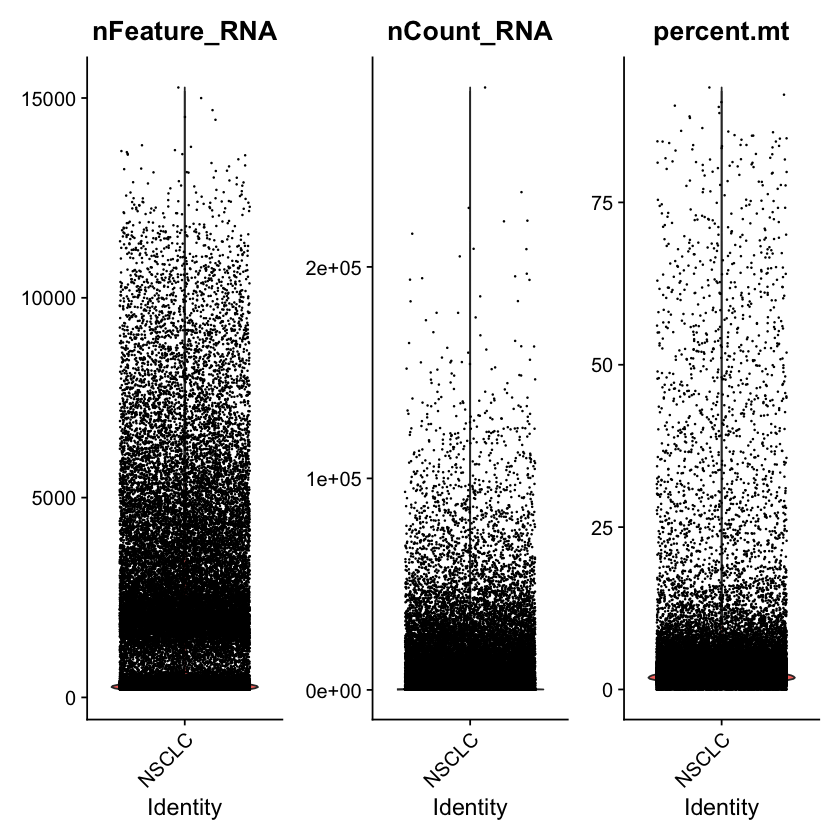

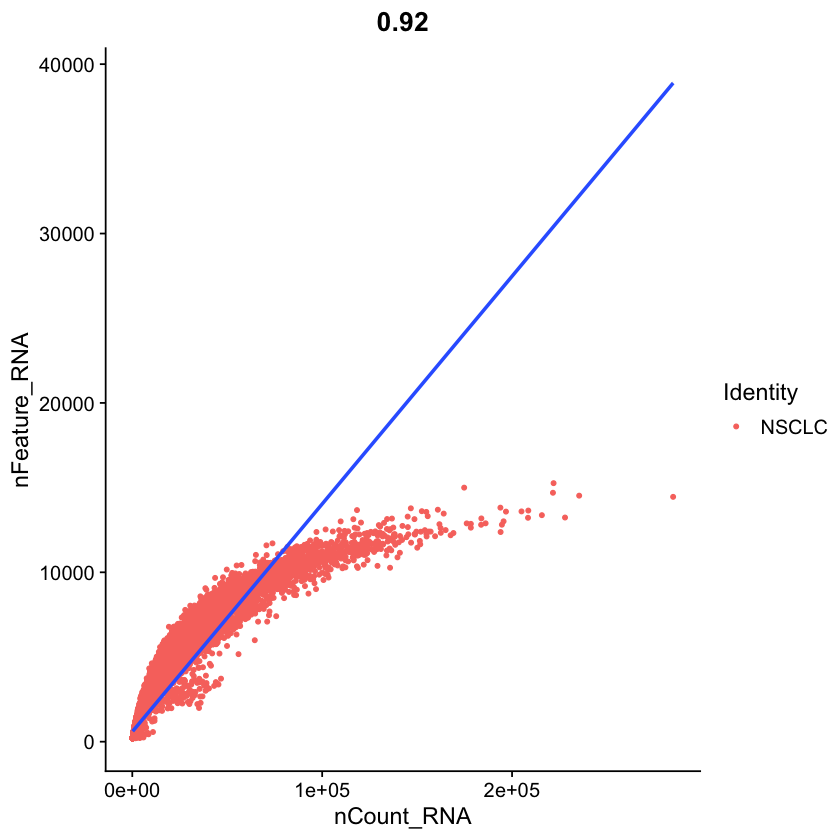

In [66]:
View(nsclc.seurat.obj@meta.data)
# % MT reads
nsclc.seurat.obj[["percent.mt"]] <- PercentageFeatureSet(nsclc.seurat.obj, pattern = "^MT-")
View(nsclc.seurat.obj@meta.data)

VlnPlot(nsclc.seurat.obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
FeatureScatter(nsclc.seurat.obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") +
  geom_smooth(method = 'lm')

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Filtering

In [80]:
nsclc.seurat.obj <- subset(nsclc.seurat.obj, subset = nFeature_RNA > n_Feature_RNA_low & nFeature_RNA < n_Feature_RNA_high & 
                          percent.mt < percent_mt)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
     Normalize data

In [82]:
nsclc.seurat.obj <- NormalizeData(nsclc.seurat.obj, normalization.method = normalize, scale.factor = scale_factor)

str(nsclc.seurat.obj)


Normalizing layer: counts



Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 2
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:27437745] 51 190 437 535 538 714 721 835 911 927 ...
  .. .. .. .. .. .. ..@ p       : int [1:54054] 0 263 589 1082 1428 1847 2154 2435 2755 2986 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 32978 54053
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:27437745] 1 1 2 1 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data  :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:27437745] 51 190 437 535 538 714 721 835 911 927 ...
  .. .. .. .. .. .. ..@ p       : int [1:54054] 0 263 589 1082 1428 1

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
     Identify highly variable features

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


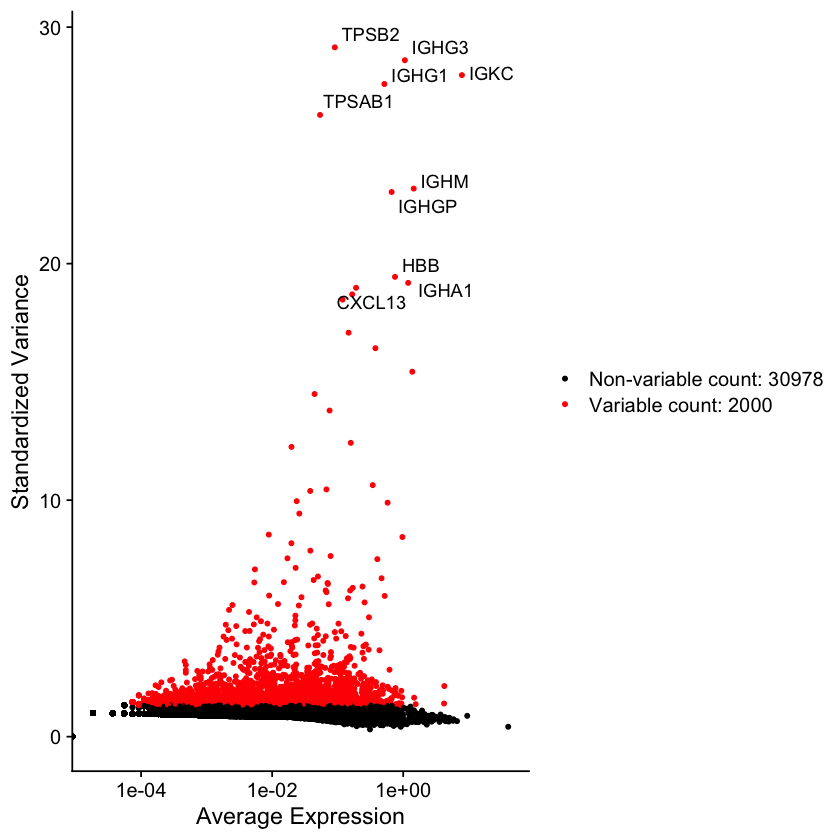

In [90]:
nsclc.seurat.obj <- FindVariableFeatures(nsclc.seurat.obj, selection.method = "vst", nfeatures = n_features)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(nsclc.seurat.obj), topn)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(nsclc.seurat.obj)
LabelPoints(plot = plot1, points = top10, repel = TRUE)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
      Scaling

In [116]:
all.genes <- rownames(nsclc.seurat.obj)


In [120]:

variable.genes <- VariableFeatures(nsclc.seurat.obj)
nsclc.seurat.obj <- ScaleData(nsclc.seurat.obj, features = variable.genes)

Centering and scaling data matrix



<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
       Linear dimensionality Reduction 

In [122]:
nsclc.seurat.obj <- RunPCA(nsclc.seurat.obj, features = VariableFeatures(object = nsclc.seurat.obj))



PC_ 1 
Positive:  FTL, IGKC, SPP1, CXCL8, APOE, IGHG3, LYZ, IGHGP, APOC1, IGHA1 
	   COL3A1, CST3, SFTPC, IGLC2, FTH1, COL1A1, DST, CCL18, G0S2, C1QB 
	   IFI27, C1QA, FN1, C15orf48, CXCL3, IGHG4, SLPI, RNASE1, OLR1, TFF3 
Negative:  CD2, CNOT6L, FYN, CD69, GNG2, PPP1R16B, STAT4, CD96, BICDL1, MTRNR2L12 
	   AP001011.1, PARP8, SYTL3, CD3D, PBX4, RALGAPA1, BCL11B, CLEC2D, ITK, FAM107B 
	   NR3C1, CD247, ZC3HAV1, LTB, CDC14A, CBLB, IL7R, SMCHD1, CAMK4, RNF19A 
PC_ 2 
Positive:  CD2, CD3D, CD96, CD3G, BCL11B, CCL5, IL32, CD247, ITK, CD7 
	   IL7R, PRKCH, FYN, GZMA, NKG7, CST7, BICDL1, ICOS, THEMIS, FYB1 
	   TRBC1, PDE3B, IFNG, KLRK1, PRKCQ, NIBAN1, GZMH, TRAC, SKAP1, GPRIN3 
Negative:  BANK1, MS4A1, CD79A, ADAM28, AC120193.1, VPREB3, EBF1, ARHGAP24, GNG7, MEF2C 
	   RUBCNL, LY9, BLK, AFF3, TNFRSF13C, LYN, FCRL1, TNFRSF13B, ST6GAL1, SWAP70 
	   LINC00926, PIKFYVE, AP002075.1, SNED1, FAM49A, PLEKHG1, IRF8, LINC01857, AC105402.3, RALGPS2 
PC_ 3 
Positive:  NKG7, CCL5, KLRK1, GZMH, KLRD1, GZ

In [123]:
# visualize PCA results
print(nsclc.seurat.obj[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  FTL, IGKC, SPP1, CXCL8, APOE 
Negative:  CD2, CNOT6L, FYN, CD69, GNG2 
PC_ 2 
Positive:  CD2, CD3D, CD96, CD3G, BCL11B 
Negative:  BANK1, MS4A1, CD79A, ADAM28, AC120193.1 
PC_ 3 
Positive:  NKG7, CCL5, KLRK1, GZMH, KLRD1 
Negative:  FAAH2, TNFRSF4, ZC3H12D, CD28, CTLA4 
PC_ 4 
Positive:  LTB, MS4A1, VPREB3, BANK1, CD79A 
Negative:  AQP9, FCN1, S100A8, S100A9, DOCK4 
PC_ 5 
Positive:  P2RY8, IL7R, ANK3, CD40LG, MPP7 
Negative:  CTLA4, TNFRSF9, IKZF2, TIGIT, TNFRSF18 


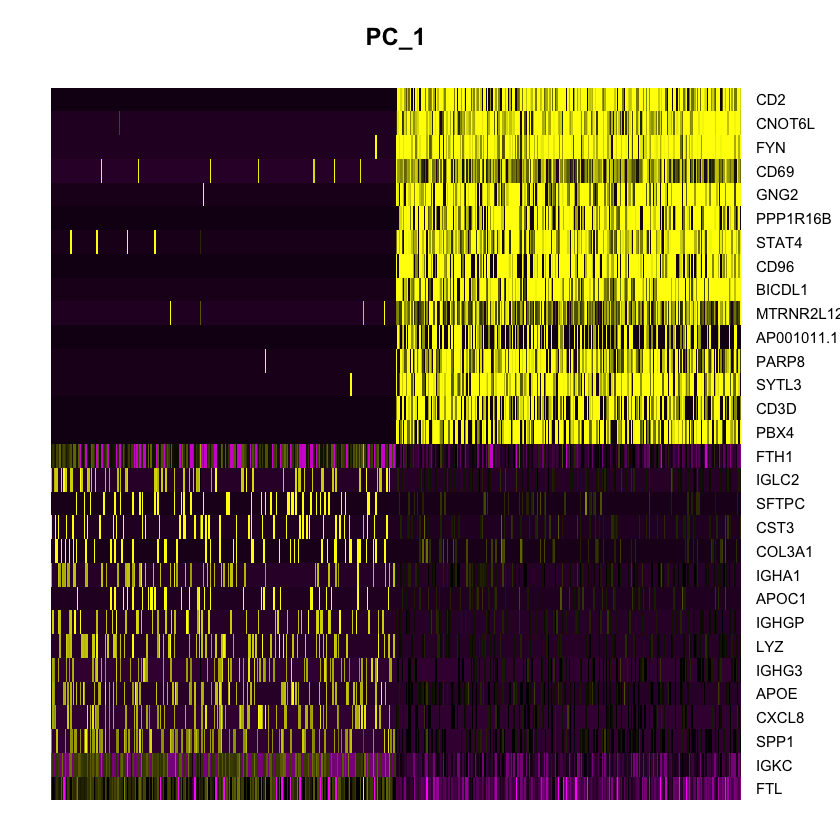

In [124]:
DimHeatmap(nsclc.seurat.obj, dims = 1, cells = 500, balanced = TRUE)

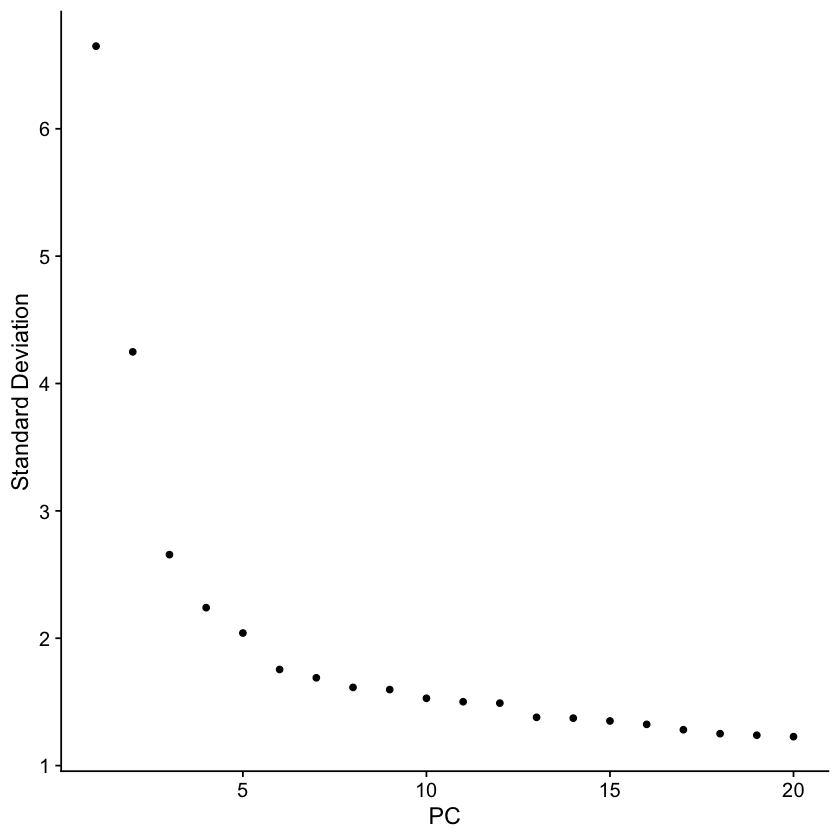

In [127]:
# determine dimensionality of the data
ElbowPlot(nsclc.seurat.obj)


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
       Cluster the cells

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 54053
Number of edges: 963620

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9516
Number of communities: 6
Elapsed time: 5 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 54053
Number of edges: 963620

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 8
Elapsed time: 5 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 54053
Number of edges: 963620

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 12
Elapsed time: 6 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 54053
Number of edges: 963620

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7635
Number of communities: 13
Elapsed time: 6 seconds
Modularity Opt

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAAGACCTCCG-1 NSCLC       305        263         3.2786885 
AAACCCAAGAGATTCA-1 NSCLC       376        326         3.4574468 
AAACCCAAGATTGACA-1 NSCLC       609        493         1.6420361 
AAACCCAAGCAAATCA-1 NSCLC       401        346         1.7456359 
AAACCCAAGCAATTCC-1 NSCLC       489        419         1.8404908 
AAACCCAAGCCGTTGC-1 NSCLC       348        307         1.4367816 
AAACCCAAGCCTCTCT-1 NSCLC       337        281         1.1869436 
AAACCCAAGCGGTAAC-1 NSCLC       359        320         2.2284123 
AAACCCAAGCTTCGTA-1 NSCLC       265        231         1.1320755 
AAACCCAAGCTTTCTT-1 NSCLC       309        270         0.9708738 
AAACCCAAGGAGAATG-1 NSCLC       317        270         1.2618297 
AAACCCAAGGCTCCCA-1 NSCLC       446        378         1.5695067 
AAACCCAAGGGAACAA-1 NSCLC       285        245         2.1052632 
AAACCCAAGGTCACTT-1 NSCLC       454        396         1.7621145 
AAACCCAAGGTGATCG-1 NSCLC       229        204         1.7467249 
AAACCCAAGTAACGTA-1 NSCLC       670        549         1.3432836 
AAACCCAAGTATCTGC-1 NSCLC       272        232         1.8382353 
AAACCCAAGTATGGAT-1 NSCLC       344        296         3.4883721 
AAACCCAAGTCATTGC-1 NSCLC       318        288         1.2578616 
AAACCCAAGTTAGTGA-1 NSCLC       326        285         1.5337423 
AAACCCACAAACCATC-1 NSCLC       366        325         2.4590164 
AAACCCACAAAGAACT-1 NSCLC       451        374         2.2172949 
AAACCCACAAAGCTAA-1 NSCLC       831        637         3.0084236 
AAACCCACAAATGGAT-1 NSCLC       669        559         2.5411061 
AAACCCACAATTGAGA-1 NSCLC       391        345         2.0460358 
AAACCCACACTCGATA-1 NSCLC       454        382         2.2026432 
AAACCCACACTTGGCG-1 NSCLC       229        211         4.8034934 
AAACCCACAGACATCT-1 NSCLC      4400       1796         1.1818182 
AAACCCACAGATACTC-1 NSCLC       357        317         2.5210084 
AAACCCACAGCCGGTT-1 NSCLC      5625       1873         0.9600000 
⋮                  ⋮          ⋮          ⋮            ⋮         
TTTGTTGCATGTGCTA-1 NSCLC       277        243         2.1660650 
TTTGTTGGTAATCAGA-1 NSCLC       302        277         3.3112583 
TTTGTTGGTAGTATAG-1 NSCLC       279        253         2.1505376 
TTTGTTGGTATTCCTT-1 NSCLC       321        284         0.9345794 
TTTGTTGGTCTTACTT-1 NSCLC       252        232         1.5873016 
TTTGTTGGTCTTGCTC-1 NSCLC       249        228         3.6144578 
TTTGTTGGTGACGTCC-1 NSCLC       241        214         2.4896266 
TTTGTTGGTGCTTCAA-1 NSCLC       280        256         2.5000000 
TTTGTTGGTTCAACGT-1 NSCLC       252        228         2.7777778 
TTTGTTGGTTCTCACC-1 NSCLC       300        267         1.3333333 
TTTGTTGTCAAGCCAT-1 NSCLC      5924       1984         3.0891290 
TTTGTTGTCAGACCCG-1 NSCLC       355        311         0.8450704 
TTTGTTGTCATCCTAT-1 NSCLC       347        289         4.3227666 
TTTGTTGTCATCTATC-1 NSCLC      6662       2365         4.0378265 
TTTGTTGTCCACCTGT-1 NSCLC       279        249         3.2258065 
TTTGTTGTCCACGTAA-1 NSCLC      2766       1284         2.0968908 
TTTGTTGTCCCATTTA-1 NSCLC       437        366         2.0594966 
TTTGTTGTCCGTGGCA-1 NSCLC       224        204         2.6785714 
TTTGTTGTCCGTGTGG-1 NSCLC       222        212         1.8018018 
TTTGTTGTCCTGGGAC-1 NSCLC       267        240         0.7490637 
TTTGTTGTCGAAATCC-1 NSCLC      6598       1908         2.9402849 
TTTGTTGTCGCTACGG-1 NSCLC       309        268         1.2944984 
TTTGTTGTCGGTTCAA-1 NSCLC       339        293         0.5899705 
TTTGTTGTCTCGAACA-1 NSCLC       298        262         2.3489933 
TTTGTTGTCTCGCAGG-1 NSCLC       339        294         1.4749263 
TTTGTTGTCTGAGGCC-1 NSCLC       288        255         2.0833333 
TTTGTTGTCTGGGAGA-1 NSCLC       242        222         0.8264463 
TTTGTTGTCTGTCCCA-1 NSCLC       396        338         1.7676768 
TTTGTTGTCTTGGAAC-1 NSCLC      7290       2477         2.2770919 
TTTGTTGTCTTTCGAT-1 NSCLC       305        267         

AAACCCAAGACCTCCG-1 AAACCCAAGAGATTCA-1 AAACCCAAGATTGACA-1 AAACCCAAGCAAATCA-1 
                 3                  0                  0                  0 
AAACCCAAGCAATTCC-1 AAACCCAAGCCGTTGC-1 AAACCCAAGCCTCTCT-1 AAACCCAAGCGGTAAC-1 
                 0                  3                  0                  0 
AAACCCAAGCTTCGTA-1 AAACCCAAGCTTTCTT-1 AAACCCAAGGAGAATG-1 AAACCCAAGGCTCCCA-1 
                 2                  5                 11                  0 
AAACCCAAGGGAACAA-1 AAACCCAAGGTCACTT-1 AAACCCAAGGTGATCG-1 AAACCCAAGTAACGTA-1 
                 3                  0                  2                  0 
AAACCCAAGTATCTGC-1 AAACCCAAGTATGGAT-1 AAACCCAAGTCATTGC-1 AAACCCAAGTTAGTGA-1 
                 0                 11                  5                  0 
AAACCCACAAACCATC-1 AAACCCACAAAGAACT-1 AAACCCACAAAGCTAA-1 AAACCCACAAATGGAT-1 
                 5                  0                  0                  0 
AAACCCACAATTGAGA-1 AAACCCACACTCGATA-1 AAACCCACACTTGGCG-1 AAACCCACAGACATCT-1 
                 0                  0                  1                 12 
AAACCCACAGATACTC-1 AAACCCACAGCCGGTT-1 AAACCCACAGCCTACG-1 AAACCCACAGCCTATA-1 
                 5                  8                  2                  0 
AAACCCACAGTGGGTA-1 AAACCCACATGCCGGT-1 AAACCCACATGGATCT-1 AAACCCACATGTTACG-1 
                 6                  7                  0                  0 
AAACCCAGTAGTGCGA-1 AAACCCAGTATACCTG-1 AAACCCAGTCAAAGCG-1 AAACCCAGTCACGTGC-1 
                 1                  2                  3                  6 
AAACCCAGTCACTTCC-1 AAACCCAGTCCACAGC-1 AAACCCAGTCGAATTC-1 AAACCCAGTCGAGCTC-1 
                 5                  6                  4                  2 
AAACCCAGTCGTTCAA-1 AAACCCAGTCTAGATC-1 AAACCCAGTCTTGTCC-1 AAACCCAGTGAGACCA-1 
                 6                  0                  3                  2 
AAACCCAGTTCAATCG-1 AAACCCAGTTCTGACA-1 AAACCCAGTTCTTCAT-1 AAACCCAGTTGAAGTA-1 
                 8                  0                  0                  6 
AAACCCATCAAAGCCT-1 AAACCCATCAAGCCTA-1 AAACCCATCAAGTGTC-1 AAACCCATCACCCTCA-1 
                 3                  0                  6                  5 
AAACCCATCACGGACC-1 AAACCCATCAGACATC-1 AAACCCATCCAAGCTA-1 AAACCCATCCAATGCA-1 
                 4                  0                  5                  2 
AAACCCATCCATATGG-1 AAACCCATCCGTACGG-1 AAACCCATCCTTCAGC-1 AAACCCATCGAGCCAC-1 
                 9                  1                  0                  0 
AAACCCATCGGTCATA-1 AAACCCATCGGTGCAC-1 AAACCCATCTAGAACC-1 AAACCCATCTGAGGTT-1 
                 5                  5                  0                  3 
AAACCCATCTGGTGGC-1 AAACCCATCTTCCGTG-1 AAACGAAAGAGCCTGA-1 AAACGAAAGCAGTACG-1 
                 6                  3                  2                  7 
AAACGAAAGCATAGGC-1 AAACGAAAGCCGATCC-1 AAACGAAAGGAGGTTC-1 AAACGAAAGGCTAAAT-1 
                 0                  1                  3                  2 
AAACGAAAGGTCATCT-1 AAACGAAAGTGCCGAA-1 AAACGAAAGTGGTTCT-1 AAACGAACAAATACAG-1 
                18                  7                  8                  0 
AAACGAACAAATGATG-1 AAACGAACAAGACGAC-1 AAACGAACAAGGCGTA-1 AAACGAACAAGGGCAT-1 
                 2                  1                  3                  0 
AAACGAACAAGGTCTT-1 AAACGAACACAAATGA-1 AAACGAACACACACTA-1 AAACGAACACATCCCT-1 
                 2                 12                  0                  0 
AAACGAACACCAGCCA-1 AAACGAACACCGAATT-1 AAACGAACACCGTGGT-1 AAACGAACACGACGAA-1 
                 7                 14                 10                 16 
AAACGAACAGAATTCC-1 AAACGAACAGACAATA-1 AAACGAACAGACGCTC-1 AAACGAACAGCCCACA-1 
                 0                  5                  0                  2 
AAACGAACAGGACATG-1 AAACGAACAGTGACCC-1 AAACGAACAGTGGCTC-1 AAACGAACATACCACA-1 
                 0                  4                  6                  0 
AAACGAACATACGCAT-1 AAACGAACATCATGAC-1 AAACGAACATCGGATT-1 AAACGAACATGACAAA-1 
                 0                 10                  9                 

AAACCCAAGACCTCCG-1 AAACCCAAGAGATTCA-1 AAACCCAAGATTGACA-1 AAACCCAAGCAAATCA-1 
                 0                  0                  0                  0 
AAACCCAAGCAATTCC-1 AAACCCAAGCCGTTGC-1 AAACCCAAGCCTCTCT-1 AAACCCAAGCGGTAAC-1 
                 0                  0                  0                  0 
AAACCCAAGCTTCGTA-1 AAACCCAAGCTTTCTT-1 AAACCCAAGGAGAATG-1 AAACCCAAGGCTCCCA-1 
                 0                  0                  0                  0 
AAACCCAAGGGAACAA-1 AAACCCAAGGTCACTT-1 AAACCCAAGGTGATCG-1 AAACCCAAGTAACGTA-1 
                 0                  0                  0                  0 
AAACCCAAGTATCTGC-1 AAACCCAAGTATGGAT-1 AAACCCAAGTCATTGC-1 AAACCCAAGTTAGTGA-1 
                 0                  0                  0                  0 
AAACCCACAAACCATC-1 AAACCCACAAAGAACT-1 AAACCCACAAAGCTAA-1 AAACCCACAAATGGAT-1 
                 0                  0                  0                  0 
AAACCCACAATTGAGA-1 AAACCCACACTCGATA-1 AAACCCACACTTGGCG-1 AAACCCACAGACATCT-1 
                 0                  0                  0                  1 
AAACCCACAGATACTC-1 AAACCCACAGCCGGTT-1 AAACCCACAGCCTACG-1 AAACCCACAGCCTATA-1 
                 0                  1                  0                  0 
AAACCCACAGTGGGTA-1 AAACCCACATGCCGGT-1 AAACCCACATGGATCT-1 AAACCCACATGTTACG-1 
                 0                  0                  0                  0 
AAACCCAGTAGTGCGA-1 AAACCCAGTATACCTG-1 AAACCCAGTCAAAGCG-1 AAACCCAGTCACGTGC-1 
                 0                  0                  0                  0 
AAACCCAGTCACTTCC-1 AAACCCAGTCCACAGC-1 AAACCCAGTCGAATTC-1 AAACCCAGTCGAGCTC-1 
                 0                  0                  0                  0 
AAACCCAGTCGTTCAA-1 AAACCCAGTCTAGATC-1 AAACCCAGTCTTGTCC-1 AAACCCAGTGAGACCA-1 
                 0                  0                  0                  0 
AAACCCAGTTCAATCG-1 AAACCCAGTTCTGACA-1 AAACCCAGTTCTTCAT-1 AAACCCAGTTGAAGTA-1 
                 1                  0                  0                  0 
AAACCCATCAAAGCCT-1 AAACCCATCAAGCCTA-1 AAACCCATCAAGTGTC-1 AAACCCATCACCCTCA-1 
                 0                  0                  0                  0 
AAACCCATCACGGACC-1 AAACCCATCAGACATC-1 AAACCCATCCAAGCTA-1 AAACCCATCCAATGCA-1 
                 0                  0                  0                  0 
AAACCCATCCATATGG-1 AAACCCATCCGTACGG-1 AAACCCATCCTTCAGC-1 AAACCCATCGAGCCAC-1 
                 2                  0                  0                  0 
AAACCCATCGGTCATA-1 AAACCCATCGGTGCAC-1 AAACCCATCTAGAACC-1 AAACCCATCTGAGGTT-1 
                 0                  0                  0                  0 
AAACCCATCTGGTGGC-1 AAACCCATCTTCCGTG-1 AAACGAAAGAGCCTGA-1 AAACGAAAGCAGTACG-1 
                 0                  0                  0                  0 
AAACGAAAGCATAGGC-1 AAACGAAAGCCGATCC-1 AAACGAAAGGAGGTTC-1 AAACGAAAGGCTAAAT-1 
                 0                  0                  0                  0 
AAACGAAAGGTCATCT-1 AAACGAAAGTGCCGAA-1 AAACGAAAGTGGTTCT-1 AAACGAACAAATACAG-1 
                 4                  0                  1                  0 
AAACGAACAAATGATG-1 AAACGAACAAGACGAC-1 AAACGAACAAGGCGTA-1 AAACGAACAAGGGCAT-1 
                 0                  0                  0                  0 
AAACGAACAAGGTCTT-1 AAACGAACACAAATGA-1 AAACGAACACACACTA-1 AAACGAACACATCCCT-1 
                 0                  1                  0                  0 
AAACGAACACCAGCCA-1 AAACGAACACCGAATT-1 AAACGAACACCGTGGT-1 AAACGAACACGACGAA-1 
                 0                  1                  1                  1 
AAACGAACAGAATTCC-1 AAACGAACAGACAATA-1 AAACGAACAGACGCTC-1 AAACGAACAGCCCACA-1 
                 0                  0                  0                  0 
AAACGAACAGGACATG-1 AAACGAACAGTGACCC-1 AAACGAACAGTGGCTC-1 AAACGAACATACCACA-1 
                 0                  0                  0                  0 
AAACGAACATACGCAT-1 AAACGAACATCATGAC-1 AAACGAACATCGGATT-1 AAACGAACATGACAAA-1 
                 0                  1                  2                 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:07:27 UMAP embedding parameters a = 0.9922 b = 1.112

22:07:27 Read 54053 rows and found 15 numeric columns

22:07:27 Using Annoy for neighbor search, n_neighbors = 30

22:07:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:07:33 Writing NN index file to temp file /var/folders/83/5zmj3k997tj3k4wsb646v2v80000gn/T//Rtmpfsiujy/file5b234459163f

22:07:33 Searching Annoy index using 1 thread, search_k = 3000

22:07:46 Annoy recall = 100%

22:07:46 Commencing smooth kNN distance calibra

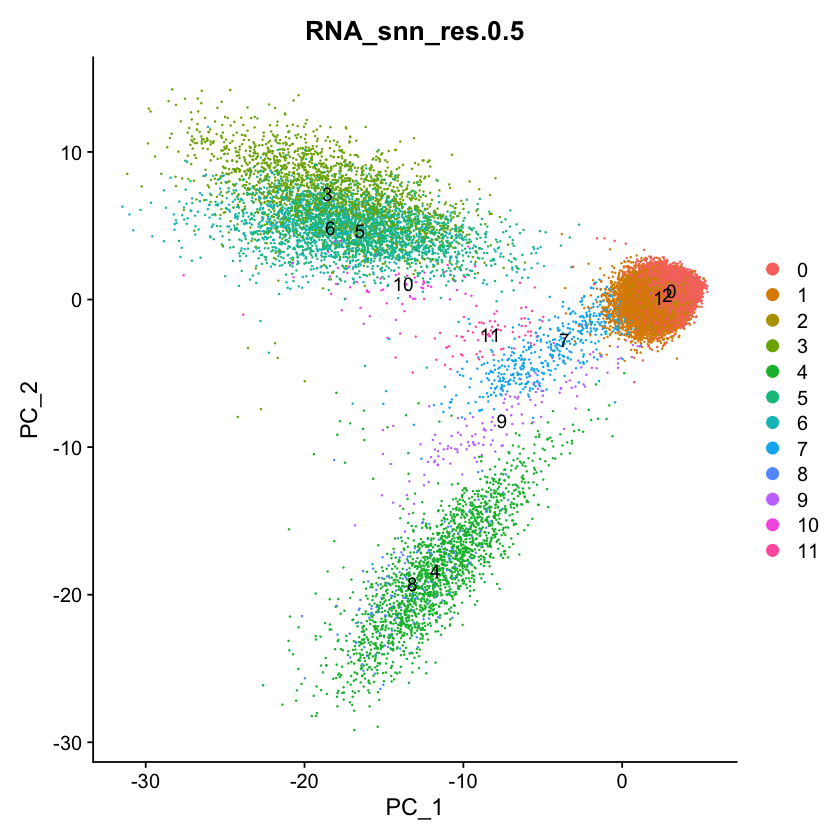

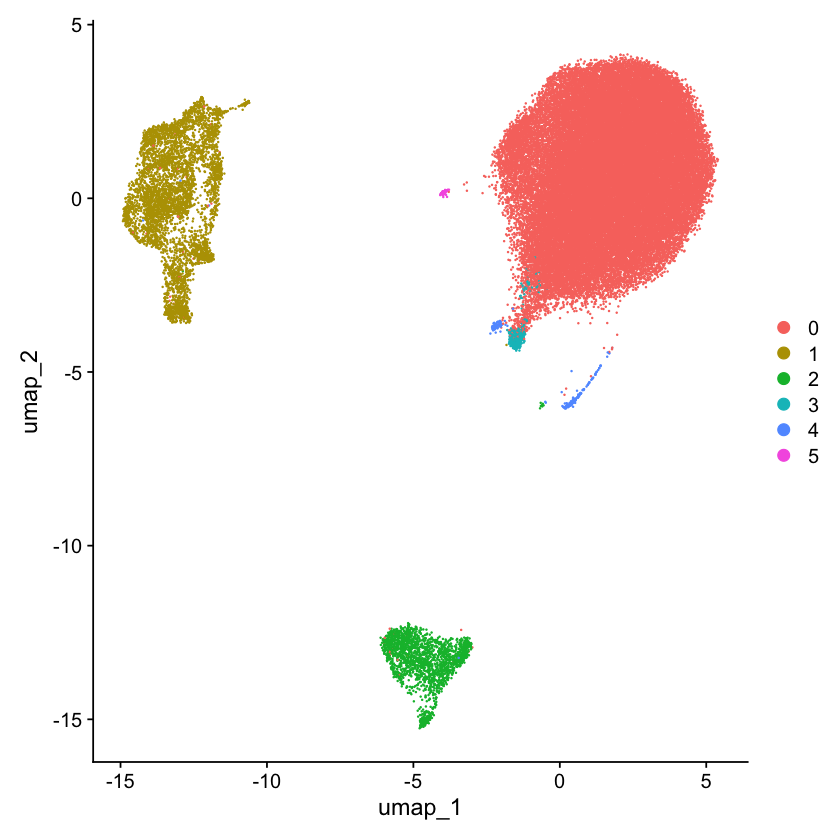

In [129]:
nsclc.seurat.obj <- FindNeighbors(nsclc.seurat.obj, dims = 1:15)

# understanding resolution
nsclc.seurat.obj <- FindClusters(nsclc.seurat.obj, resolution = c(0.1,0.3, 0.5, 0.7, 1))
View(nsclc.seurat.obj@meta.data)

DimPlot(nsclc.seurat.obj, group.by = "RNA_snn_res.0.5", label = TRUE)

# setting identity of clusters
Idents(nsclc.seurat.obj)
Idents(nsclc.seurat.obj) <- "RNA_snn_res.0.1"
Idents(nsclc.seurat.obj)

# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
nsclc.seurat.obj <- RunUMAP(nsclc.seurat.obj, dims = 1:15)
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(nsclc.seurat.obj, reduction = "umap")